# Základy práce s Python v Google API - Vision
Python lze použít jako základní scriptovací jazyk, nebo jako silný programovací jazyk s objekty a vlasními knohovnami. V tomto cvičení budeme využívat ukázek spouštěšní scriptů v prostředí jupyter, které umožňuje interaktivní práci s jazykem Python. Detaily na (https://jupyter.org/).

Příkazy se zpracovávají jeden po druhém, symbol ukončení je konec řádku, vnitřní blok se odděluje tabulátorem

# Google API a instalace knihoven
Klíčové knihovny, které budeme používat pro práci s google api jsou k dispozici v rámci instalačních balíků pomocí pip (https://pip.pypa.io/en/stable/) nebo přes nástroj Anaconda (https://www.anaconda.com/) (již máte nainsotalované na vašich virtuálních strojích). Konkrétní knihovny, které budeme potřebovat jsou nálsedující:
- `google-cloud-language` pro analýzu jazyka
- `google-cloud-vision` pro analýzu pbrazu
- `google-cloud` zastřešující balík, pokud nechcete načítat jednotlivé balíky 
- `google-oauth` pro zajištění snadné autentizace

Je důležité vědět, jak si potřebné knihovny do Python nainstalovat. K tomu slouží příkaz

```pip install --user --upgrade google-cloud-language google-cloud google-cloud-vision google-oauth matplotlib ipython```,

který spusťte v příkazové řádce (Windows => Start => Command prompt)

Základem jazyka Python je práce s knihovnami a kontrola, že vše je správně nainstalované. Načtení knihovan a ověření provedeme pomocí následujícího příkazu:

In [1]:
from google.cloud import vision
from google.oauth2 import service_account

V případě, že se vám povedlo předchozí příkazy spustit bez chybových hlášek, je vše korektně nainstalováno a je možné začít pracovat s Google API. Než k tomu přistoupíme, bude potřeba ještě nahrát knihovny pro práci s obrázky

In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io
from colour import Color

Dalším kontrolním bodem je schopnost přihlásit se k vašemu účtu z Python, k tomu slouží následující příkazy. Je potřeba začít s tím, aby jste již vygenerovaný soubor s přihlašovacími údaji zpřístupnili pythony:

In [3]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [4]:
client = vision.ImageAnnotatorClient(credentials=creds)

Začneme jednoduchým testem funkčnosti API na jednom obrázku, odkaz na název dejme do proměnné:

In [5]:
soubor = './data/tym6/115901.jpg'

Načteme obrázek ze souboru:

In [6]:
with io.open(soubor, 'rb') as image_file:
    content = image_file.read()

Předáme obrázek do Google knihovny ```vision```:

In [7]:
image = vision.Image(content = content)

Nyní můžeme odeslat obrázek ke zpracování pomocí Google API a získat popis obrázku pomocí funkce ```label_detection```. Detail k funkci najdete na následujících stránkách (https://googleapis.dev/python/vision/latest/vision_v1/services.html).

In [8]:
response = client.label_detection(image = image)

In [9]:
response2 = client.image_properties(image=image).image_properties_annotation

print('Properties:')

for color in response2.dominant_colors.colors:
    print('fraction: {}'.format(color.pixel_fraction))
    print('\tr: {}'.format(color.color.red))
    print('\tg: {}'.format(color.color.green))
    print('\tb: {}'.format(color.color.blue))
    print('\ta: {}'.format(color.color.alpha))


Properties:
fraction: 0.19698059558868408
	r: 206.0
	g: 191.0
	b: 167.0
	a: 
fraction: 0.08679171651601791
	r: 21.0
	g: 16.0
	b: 12.0
	a: 
fraction: 0.10175805538892746
	r: 57.0
	g: 49.0
	b: 30.0
	a: 
fraction: 0.060649629682302475
	r: 109.0
	g: 128.0
	b: 158.0
	a: 
fraction: 0.06711979955434799
	r: 172.0
	g: 158.0
	b: 134.0
	a: 
fraction: 0.09300045669078827
	r: 91.0
	g: 81.0
	b: 57.0
	a: 
fraction: 0.047055747359991074
	r: 132.0
	g: 120.0
	b: 96.0
	a: 
fraction: 0.028364159166812897
	r: 129.0
	g: 146.0
	b: 173.0
	a: 
fraction: 6.535520515171811e-05
	r: 0.0
	g: 17.0
	b: 55.0
	a: 
fraction: 0.030913012102246284
	r: 35.0
	g: 29.0
	b: 13.0
	a: 


In [10]:
objects = client.object_localization(image = image).localized_object_annotations
print('Number of objects found: {}'.format(len(objects)))
for object_ in objects:
    print('\n{} (confidence: {})'.format(object_.name, object_.score))
    print('Normalized bounding polygon vertices: ')
    for vertex in object_.bounding_poly.normalized_vertices:
        print(' - ({}, {})'.format(vertex.x, vertex.y))

Number of objects found: 3

Window (confidence: 0.7265222668647766)
Normalized bounding polygon vertices: 
 - (0.6799583435058594, 0.22067581117153168)
 - (0.787877082824707, 0.22067581117153168)
 - (0.787877082824707, 0.45570072531700134)
 - (0.6799583435058594, 0.45570072531700134)

Window (confidence: 0.5870473384857178)
Normalized bounding polygon vertices: 
 - (0.46410199999809265, 0.24871639907360077)
 - (0.5670568346977234, 0.24871639907360077)
 - (0.5670568346977234, 0.4517742097377777)
 - (0.46410199999809265, 0.4517742097377777)

Window (confidence: 0.5078308582305908)
Normalized bounding polygon vertices: 
 - (0.31358104944229126, 0.285584419965744)
 - (0.39949023723602295, 0.285584419965744)
 - (0.39949023723602295, 0.4593541920185089)
 - (0.31358104944229126, 0.4593541920185089)


Výstup je k dispozici v pomocí funkce ```label_annotations```

In [11]:
labels = response.label_annotations

Než si projdeme popisky obrázku vrácené funkcí Google API, podívejme se na obrázek.

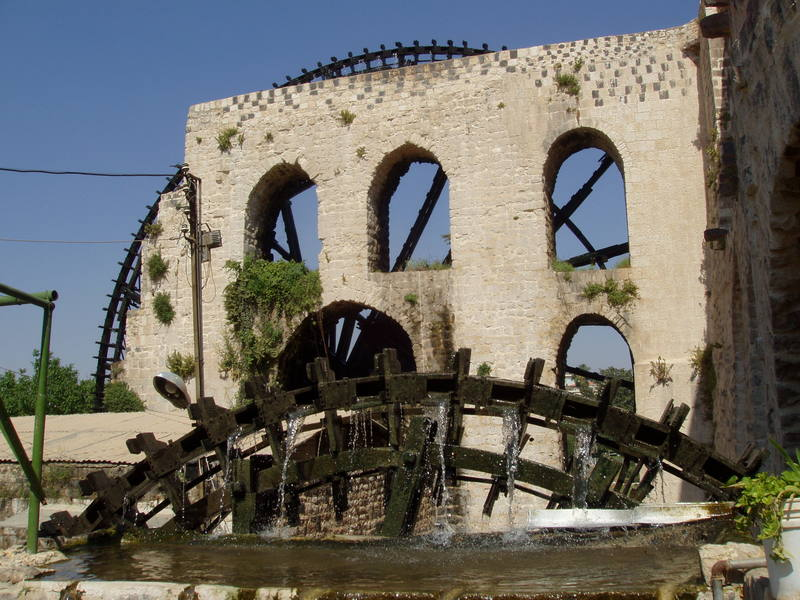

In [12]:
Image(soubor)

Nyní se podívejme, jaké ```Labels``` nám Google API vrátil:

In [13]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Arch
Arcade
Bridge
Ruins
Ancient history
Historic site
Gristmill
Water feature
Canal
Arch bridge


# Nyní trocha automatizace
projdeme všechny soubory v adresáři a provedeme analýzu na nich:

In [14]:
import os

In [15]:
path = './data/tym6'

In [16]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [17]:
def get_objects(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    objects = client.object_localization(image = image).localized_object_annotations
    return objects

In [18]:
def get_colors(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    colors = client.image_properties(image=image).image_properties_annotation
    return colors

In [19]:
labels_images = {}
objects_images = {}
colors_images = {}

In [20]:
directories = os.listdir(path)

In [21]:
for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = [i.description for i in lbls]
    labels_images[os.path.join(path, i)] = lbl_set

In [22]:
for i in directories:
    objs = get_objects(os.path.join(path, i))
    objs_set = [i.name for i in objs]
    objects_images[os.path.join(path, i)] = objs_set

In [23]:
tags_labels = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags_labels.get(j, [0, []])[0] + 1
        seznam = tags_labels.get(j, [0, []])[1]
        seznam.append(k)
        tags_labels[j] = [pocet, seznam]

In [24]:
sort_tabs_labels = sorted(tags_labels.items(), key = lambda x: x[1], reverse = True)

In [25]:
tags_objects = {}
for k, v in objects_images.items():
    for j in v:
        pocet = tags_objects.get(j, [0, []])[0] + 1
        seznam = tags_objects.get(j, [0, []])[1]
        seznam.append(k)
        tags_objects[j] = [pocet, seznam]

In [26]:
sort_tabs_objects = sorted(tags_objects.items(), key = lambda x: x[1], reverse = True)

In [27]:
print(sort_tabs_objects[0])

('Building', [5, ['./data/tym6/148501.jpg', './data/tym6/146207.jpg', './data/tym6/140500.jpg', './data/tym6/140500.jpg', './data/tym6/140300.jpg']])


In [28]:
print(sort_tabs_labels[0])

('Rock', [4, ['./data/tym6/143903.jpg', './data/tym6/131602.jpg', './data/tym6/140300.jpg', './data/tym6/143700.jpg']])


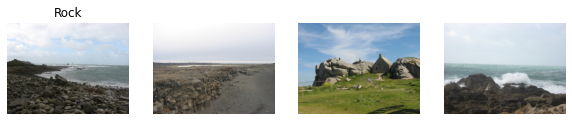

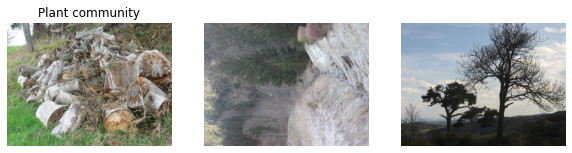

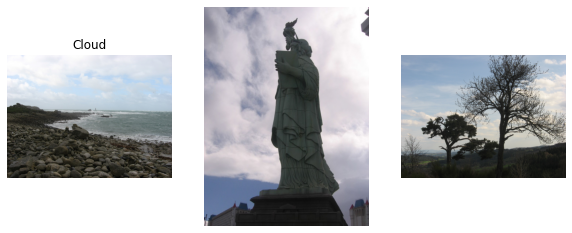

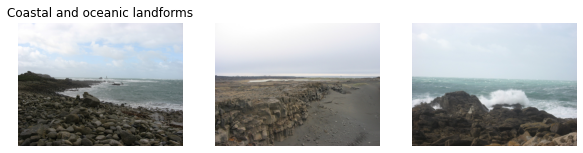

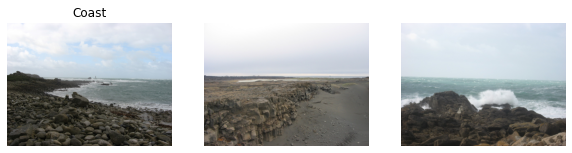

In [29]:
for k in range(5):
    pocet = sort_tabs_labels[k][1][0] #přistupuje me do struktury sort tabs - k-tý zázaznam, v něm druhý prvek a první prvek v něm
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs_labels[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs_labels[k][1][1][i]))
        ax[i].axis('off')

    plt.show()

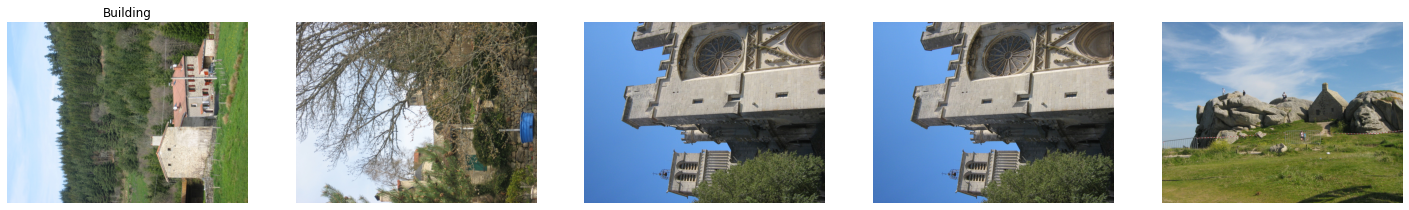

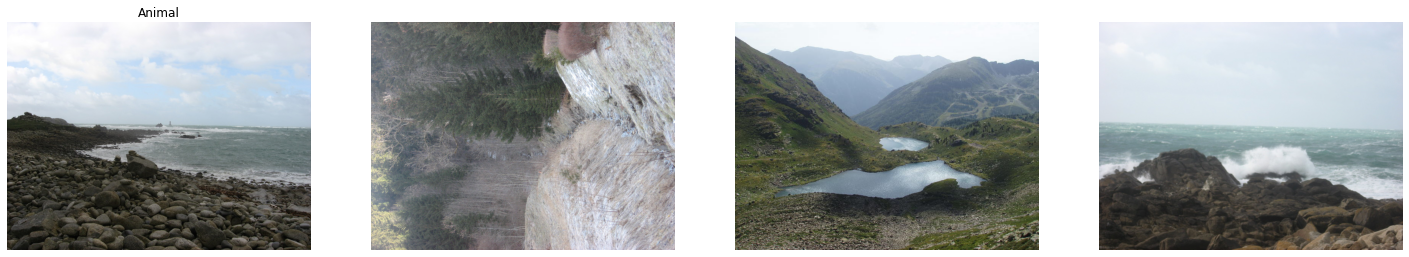

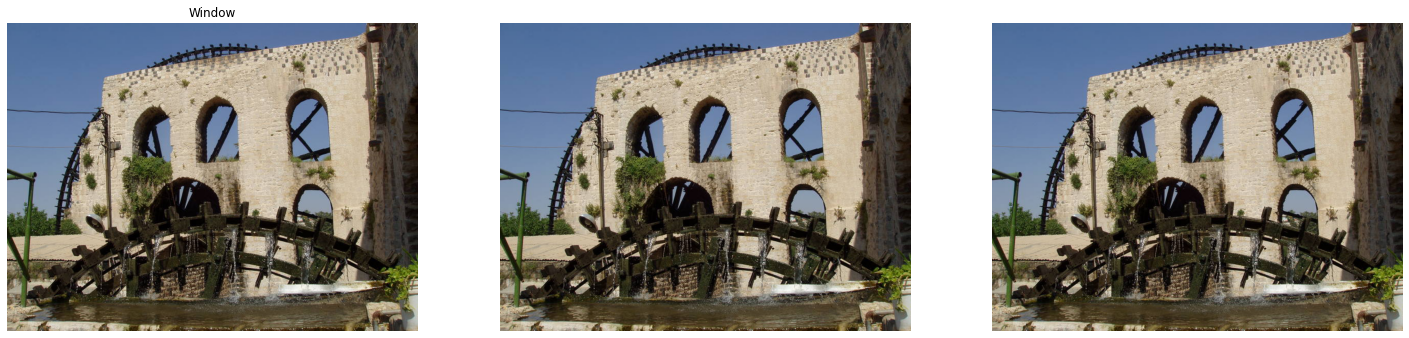

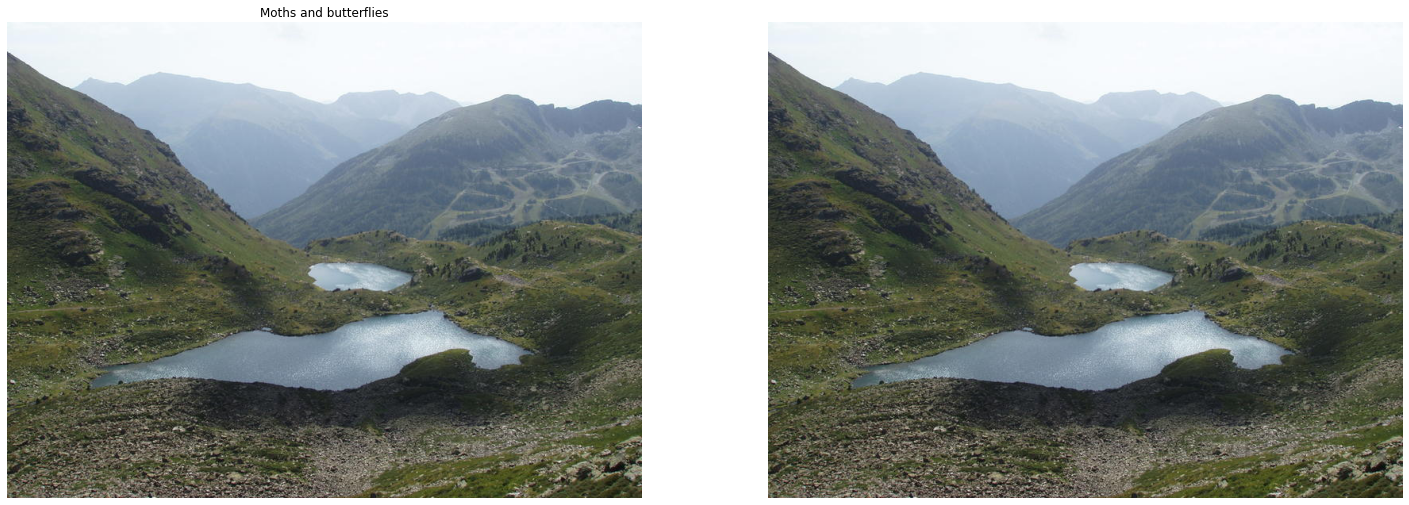

TypeError: 'AxesSubplot' object is not subscriptable

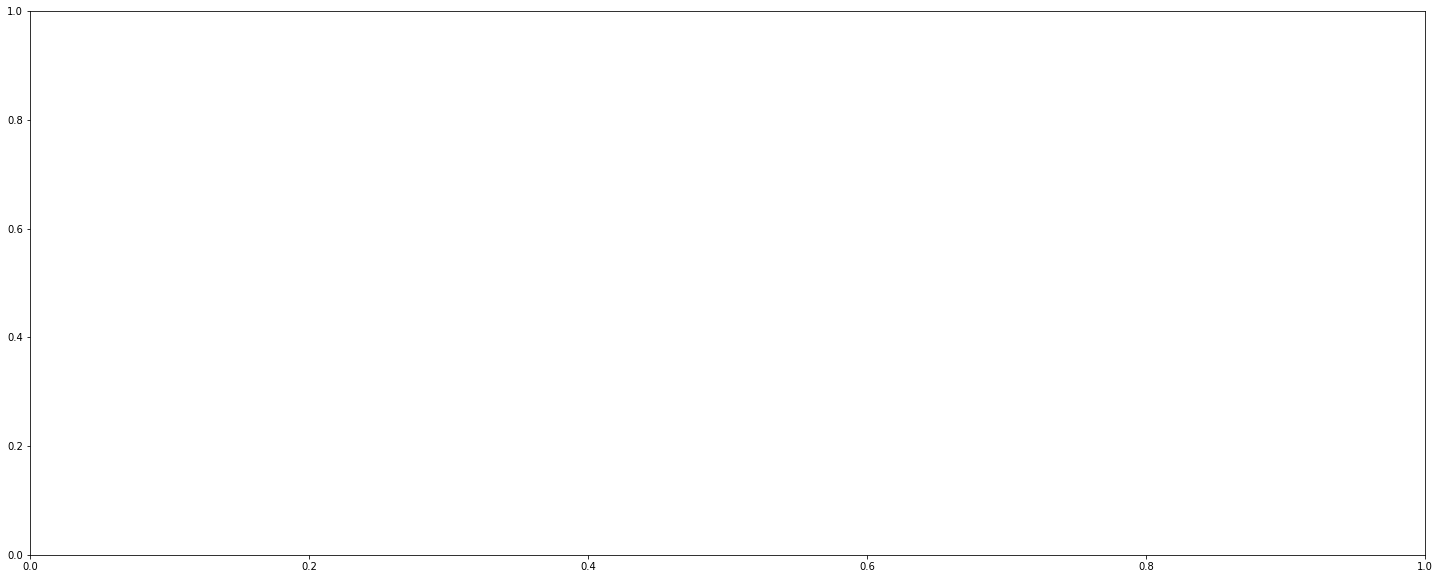

In [30]:
for k in range(5):
    pocet = sort_tabs_objects[k][1][0] #přistupuje me do struktury sort tabs - k-tý zázaznam, v něm druhý prvek a první prvek v něm
    f, ax = plt.subplots(1, pocet, figsize = (25, 10))
    ax[0].set_title(sort_tabs_objects[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs_objects[k][1][1][i]))
        ax[i].axis('off')

    plt.show()